In [4]:
def read(f, normalized=False):
    """MP3 to numpy array"""
    a = pydub.AudioSegment.from_mp3(f)
    y = np.array(a.get_array_of_samples())
    if a.channels == 2:
        y = y.reshape((-1, 2))
    if normalized:
        return a.frame_rate, np.float32(y) / 2**15
    else:
        return a.frame_rate, y

def write(f, sr, x, normalized=False):
    """numpy array to MP3"""
    channels = 2 if (x.ndim == 2 and x.shape[1] == 2) else 1
    if normalized:  # normalized array - each item should be a float in [-1, 1)
        y = np.int16(x * 2 ** 15)
    else:
        y = np.int16(x)
    song = pydub.AudioSegment(y.tobytes(), frame_rate=sr, sample_width=2, channels=channels)
    song.export(f, format="mp3", bitrate="320k")

path = "/Users/elijah/Dropbox/Programming/RoboCup/remote control/data/music/gorillaz_collar.mp3"

#rate, audio = read (path)
#write (path [:-4] + "_part.mp3", rate, audio [44100 * 25:44100 * 60])



In [20]:
from scipy.linalg import toeplitz
import numpy as np
import math

#import scipy.io.mp3file as mp3
import pydub 

import matplotlib.pyplot as plt
from IPython.display import Audio
%matplotlib notebook

from pydub import AudioSegment
from pydub.playback import play

import scipy.fftpack

sh (2000,)


<IPython.core.display.Javascript object>


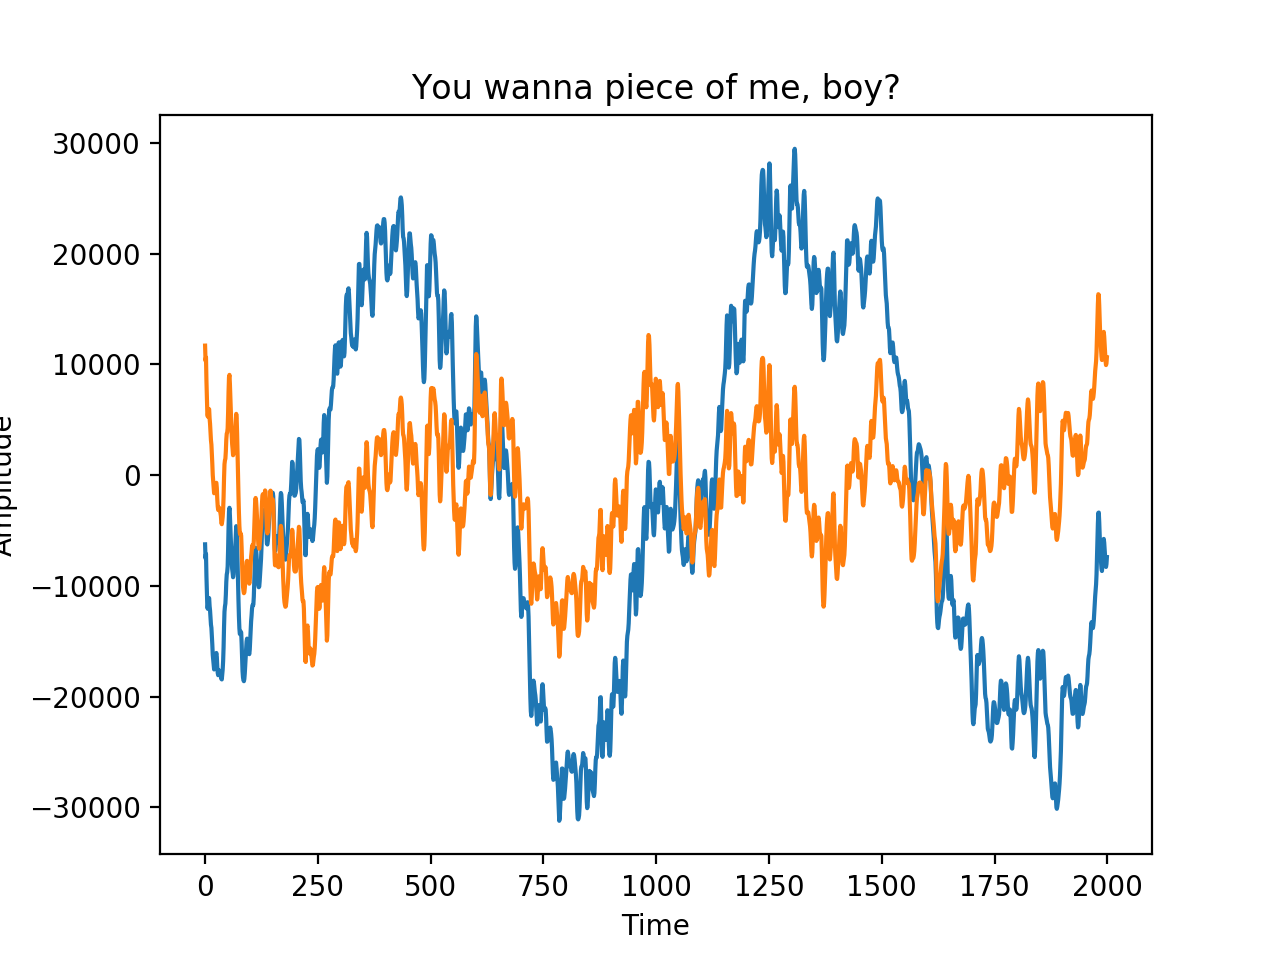

In [41]:
path_part = "/Users/elijah/Dropbox/Programming/RoboCup/remote control/data/music/gorillaz_collar_part.mp3"

rate, audio = read (path_part)

#print (len (audio)/44100)

N = 2000
an_part = audio [:2000, 1]
x = np.linspace(0,2*np.pi,N)
print ("sh", an_part.shape)

plt.plot(an_part)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("You wanna piece of me, boy?")
plt.show()

# sp = np.fft.fft (an_part)
# freq = np.fft.fftfreq(an_part.shape[-1])
# plt.plot(freq, sp.real, freq, sp.imag)

# cutoff_idx = sp < (sp.max()/1)
# w2 = freq.copy()
# w2[cutoff_idx] = 0

# y2 = scipy.fftpack.irfft(w2)

w = scipy.fftpack.rfft(an_part)
f = scipy.fftpack.rfftfreq(N, x[1]-x[0])
spectrum = w**2

cutoff_idx = spectrum > (spectrum.max() / 15)
w2 = w.copy()
w2[cutoff_idx] = 0

y2 = scipy.fftpack.irfft(w2)
#y2 = scipy.fftpack.irfft(f)

plt.plot (y2)

#plt.plot(w2)

In [27]:
song = AudioSegment.from_mp3 (path_part)
play (song)

KeyboardInterrupt: 

Our next goal is to process this signal by multiplying it by a special type of matrix (convolution operation) that will smooth the signal. 

* (5 pts) Before processing this file let us estimate what size of matrix we can afford. Let $N$ be the size of the signal. Estimate analytically memory in megabytes required to store dense square matrix of size $N\times N$ to fit in your operation memory and print this number. Cut the signal so that you will not have swap (overflow of the operation memory). **Note:** Cut the signal by taking every p-th number in array: ```signal[::p]```. 

In [3]:
#print (audio [0].dtype)
#the type is int16

#Assuming that the type of the matrix elements is float64, we get 8 bytes per one value.

N = 10000

#N^2 elements, 2 bytes per element, divide by 1024^2 to convert into megabytes

#sz = (N**2) * 8 / 1024 / 1024
#print (sz)

#Printing gives ~800 Mb. Usually I have around 1 Gb of free operational memory,
#but it's not a reason to use it all.

print(N)

10000


* (5 pts) Write a function 
```python
def gen_toeplitz(N, alpha):    
    return T
```
that outputs matrix $T$: $$T_{ij} = \sqrt{\frac{\alpha}{\pi}}e^{-\alpha (i-j)^2}, \quad i,j=1,\dots,N$$ as numpy array. <font color='red'> Avoid using loops or lists! </font> The function [np.meshgrid](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.meshgrid.html) will be helpful for this task.
**Note:** matrices that depend only on difference of indices: $T_{ij} \equiv T_{i-j}$ are called **Toeplitz**. Toeplitz matrix-by-vector multiplication is **convolution** since it can be written as $$y_i = \sum_{j=1}^N T_{i-j} x_j.$$ Convolutions can be computed faster than $\mathcal{O}(N^2)$ complexity using Fast Fourier transform (will be covered later in our course, no need to implement it here).

In [71]:
# INPUT: N - integer (positive), alpha - float (positive)
# OUTPUT: T - np.array (shape: NxN)

import math

def gen_toeplitz(N, alpha):
    # Your code is here
    
    i = np.arange (N) + 1
    j = np.arange (N) + 1
    
    x, y = np.meshgrid (i, j)
    
    #print (x)
    #print (y)
    #T = x**2 + y**2
    
    T = math.sqrt (alpha / math.pi) * math.e**(- alpha * (x - y)**2)
    
    return T

t = gen_toeplitz (15, 0.2)

print (t, "\n")

print (t@t)

[[2.52313252e-01 2.06576619e-01 1.13371652e-01 4.17071001e-02
  1.02848443e-02 1.70007332e-03 1.88373493e-04 1.39911734e-05
  6.96579506e-07 2.32471359e-08 5.20056374e-10 7.79854530e-12
  7.83896964e-14 5.28185620e-16 2.38559310e-18]
 [2.06576619e-01 2.52313252e-01 2.06576619e-01 1.13371652e-01
  4.17071001e-02 1.02848443e-02 1.70007332e-03 1.88373493e-04
  1.39911734e-05 6.96579506e-07 2.32471359e-08 5.20056374e-10
  7.79854530e-12 7.83896964e-14 5.28185620e-16]
 [1.13371652e-01 2.06576619e-01 2.52313252e-01 2.06576619e-01
  1.13371652e-01 4.17071001e-02 1.02848443e-02 1.70007332e-03
  1.88373493e-04 1.39911734e-05 6.96579506e-07 2.32471359e-08
  5.20056374e-10 7.79854530e-12 7.83896964e-14]
 [4.17071001e-02 1.13371652e-01 2.06576619e-01 2.52313252e-01
  2.06576619e-01 1.13371652e-01 4.17071001e-02 1.02848443e-02
  1.70007332e-03 1.88373493e-04 1.39911734e-05 6.96579506e-07
  2.32471359e-08 5.20056374e-10 7.79854530e-12]
 [1.02848443e-02 4.17071001e-02 1.13371652e-01 2.06576619e-01
  

## Convolution (10 pts)

* (5 pts) Write a function ```convolution``` (see below)
that takes the signal you want to convolve and multiply it by Toeplitz matrix T (for matvec operations use @ symbol). 

In [5]:
# INPUT: signal - np.array (shape: Nx1), N - int (positive), alpha - float (positive)
# OUTPUT: convolved_signal - np.array (shape: Nx1)

def convolution(signal, N, alpha):
    # Your code is here
    matr = gen_toeplitz (N, alpha)
    
    convolved_signal = matr @ signal
    
    return convolved_signal

* (3 pts) Plot the first $100$ points of the result and the first $100$ points of your signal on the same figure. Do the same plots for $\alpha = \frac{1}{5}$, $\alpha = \frac{1}{100}$ using ```plt.subplots``` in matplotlib. Each subplot should contain first $100$ points of initial and convolved signals for some $\alpha$. Make sure that you got results that look like smoothed initial signal.

* (2 pts) Play the resulting signal. In order to do so you should also scale the frequency (rate), which is one of the inputs in `Audio`.  
Note that you cannot play a signal which is too small.

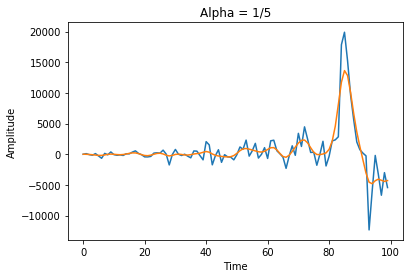

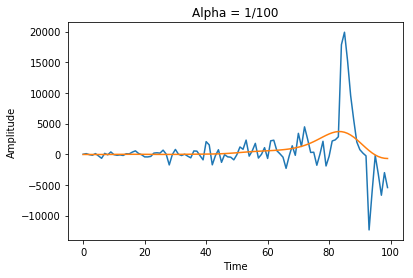

In [48]:
# Your code is here

audio_len = len (audio)

signal = audio [::20]
signal_len = len (signal)

convolved_1 = convolution (signal, signal_len, 0.2)

plt.plot(signal [:100])
plt.plot(convolved_1 [:100])
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("Alpha = 1/5")
plt.show()

convolved_2 = convolution (signal, signal_len, 0.01)

plt.plot(signal [:100])
plt.plot(convolved_2 [:100])
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("Alpha = 1/100")
plt.show()


In [49]:
Audio (signal, rate=4410)

In [50]:
Audio (convolved_1, rate=4410)

In [51]:
Audio (convolved_2, rate=4410)